<a href="https://colab.research.google.com/github/Rojashree555/Task1/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [553]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [554]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [555]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [556]:
df.describe()

,Chirps/Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [557]:
df.isnull().sum()

Chirps/Second         0
Ground_Temperature    0
dtype: int64

In [558]:
df = df.drop_duplicates()

In [559]:
df.dtypes

Chirps/Second         float64
Ground_Temperature    float64
dtype: object

In [560]:
df.shape

(15, 2)

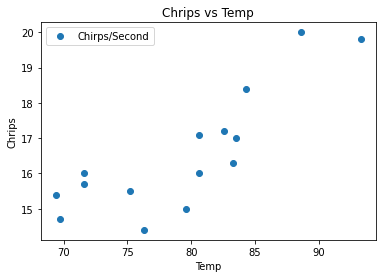

In [561]:
df.plot(x='Ground_Temperature', y='Chirps/Second', style='o')
plt.title('Chrips vs Temp')
plt.xlabel('Temp')
plt.ylabel('Chrips')
plt.show()

In [562]:
df[['Ground_Temperature','Chirps/Second']].corr()

,Ground_Temperature,Chirps/Second
Ground_Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


In [563]:
#transformation using sqrt(x)
import numpy as np
#df['transformed'] = np.power(df['Ground_Temperature'],0.5) ##squareroot of x
#df['transformed'] = np.square(df['Ground_Temperature'])  ## x ssquare
#df['transformed'] = np.exp(df['Ground_Temperature'])  ## exp(x)
#df['transformed'] = np.log(df['Ground_Temperature']) ## log(x)
#df['transformed'] = np.power(df['Ground_Temperature'],3)
#df.plot(x='transformed', y='Chirps/Second', style='o')
#plt.title('Ground_Temperature vs Chirps/Second')
#plt.xlabel('transformed')
#plt.ylabel('Chirps/Second')
#plt.show()
#df[['transformed','Chirps/Second']].corr()

In [564]:
df.Ground_Temperature	.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [565]:
X = df.loc[:, ['Ground_Temperature']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps/Second'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [566]:
y_test

array([15.4, 15.5, 15. , 19.8, 16. ])

In [567]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [568]:
X_test

array([[69.4],
       [75.2],
       [79.6],
       [93.3],
       [80.6]])

Modelling

In [569]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * Ground_Temperature + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [570]:
print(regressor.intercept_)#value of c(m*feature+c)

-0.1523532669615122


In [571]:
print(regressor.coef_)# value of slope(m)

[0.21250288]


In [572]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([14.59534673, 15.82786344, 16.76287612, 19.6741656 , 16.97537901])

In [573]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15.4,14.595347
1,15.5,15.827863
2,15.0,16.762876
3,19.8,19.674166
4,16.0,16.975379


In [574]:
regressor.predict([[120]]) 

array([25.34799255])

**Finding Chirps/Second for Ground_Temperaure=95**

In [575]:
regressor.predict([[95]]) 

array([20.0354205])

R2 score:


In [576]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6878301414458594


R2 Score is between 0 to 1 so it has a good linear relationship and it is considered as better model

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [577]:
df = pd.read_fwf("brain_body.txt", header=None, 
                 names=["Brain", "Body",])
#dataset.to_csv("brain_body.csv",index = None)

In [578]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [579]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [580]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [581]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [582]:
df.shape

(62, 2)

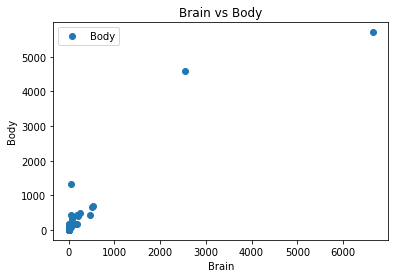

In [583]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [584]:
##IQR Findings
Q1=df.Brain.quantile(0.25)
Q3=df.Brain.quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR=Q3-Q1
lowerlimit=Q1-1.5*IQR
Upperlimit=Q3+1.5*IQR
print("IQR:",IQR)
print("lowerlimit:",lowerlimit)
print("Upperlimit:",Upperlimit)


Q1: 0.6000000000000001
Q3: 48.2025
IQR: 47.6025
lowerlimit: -70.80375000000001
Upperlimit: 119.60625


In [585]:
df[(df.Brain<-70.80375000000001)|(df.Brain>119.60625)]

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


In [586]:
df_outliers=df[(df.Brain<-70.80375000000001)|(df.Brain>119.60625)]
df_outliers

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


In [587]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [588]:
df.dtypes

Brain    float64
Body     float64
dtype: object

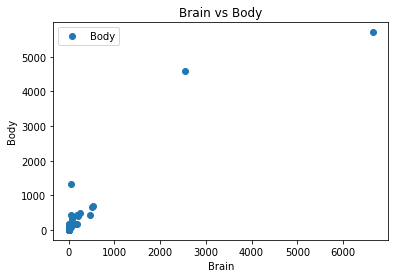

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [589]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()
df[['Brain','Body']].corr()

In [590]:
X = df.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Body'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [591]:
y_test

array([1.080e+01, 8.100e+00, 5.600e+01, 6.800e+02, 1.320e+03, 6.550e+02,
       3.250e+02, 1.230e+01, 1.700e+01, 1.400e-01, 1.570e+02, 4.603e+03,
       6.300e+00, 4.190e+02, 2.100e+01, 3.000e+00, 4.000e+00, 4.900e+02,
       6.600e+00])

In [592]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

In [593]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [594]:
print(regressor.intercept_) # c

45.21711532031185


In [595]:
print(regressor.coef_)#m

[0.85274603]


In [596]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([  48.20172642,   46.36832246,   75.06322635,  496.31976483,
         98.08736914,  489.49779659,  117.70052781,   45.85667484,
         48.67073674,   45.22137905,  130.49171825, 2217.16125198,
         46.66678357,  204.7658974 ,   48.28700103,   45.32115034,
         45.30324267,  258.40362265,   46.06986135])

In [597]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6352705883696133


R2 score is between 0 and 1 so its better model

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [598]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [599]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [600]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [601]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [602]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [603]:
df=df.drop_duplicates()

In [604]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [605]:
df.shape

(52, 6)

In [606]:
#df.loc[:,'Sex'].replace([0],"Male")
df['Sex'].replace([0,1],["Male","Female"],inplace=True)



In [607]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,3,25,1,35,36350
1,Male,3,13,1,22,35350
2,Male,3,10,1,23,28200
3,Female,3,7,1,27,26775
4,Male,3,19,0,30,33696


In [608]:
df['Rank'].replace([1,2,3],["Assistant Prof","Associate Prof","Full Prof"],inplace=True)
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,Full Prof,25,1,35,36350
1,Male,Full Prof,13,1,22,35350
2,Male,Full Prof,10,1,23,28200
3,Female,Full Prof,7,1,27,26775
4,Male,Full Prof,19,0,30,33696
5,Male,Full Prof,16,1,21,28516
6,Female,Full Prof,0,0,32,24900
7,Male,Full Prof,16,1,18,31909
8,Male,Full Prof,13,0,30,31850
9,Male,Full Prof,13,0,31,32850


In [609]:
df['Degree'].replace([0,1],["Masters","Docorate"],inplace=True)
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,Full Prof,25,Docorate,35,36350
1,Male,Full Prof,13,Docorate,22,35350
2,Male,Full Prof,10,Docorate,23,28200
3,Female,Full Prof,7,Docorate,27,26775
4,Male,Full Prof,19,Masters,30,33696
5,Male,Full Prof,16,Docorate,21,28516
6,Female,Full Prof,0,Masters,32,24900
7,Male,Full Prof,16,Docorate,18,31909
8,Male,Full Prof,13,Masters,30,31850
9,Male,Full Prof,13,Masters,31,32850


In [610]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,Full Prof,25,Docorate,35,36350
1,Male,Full Prof,13,Docorate,22,35350
2,Male,Full Prof,10,Docorate,23,28200
3,Female,Full Prof,7,Docorate,27,26775
4,Male,Full Prof,19,Masters,30,33696


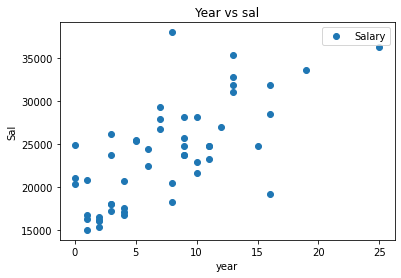

In [612]:
##EDA

df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs sal')
plt.xlabel('year')
plt.ylabel('Sal')
plt.show()




In [613]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,Full Prof,25,Docorate,35,36350
1,Male,Full Prof,13,Docorate,22,35350
2,Male,Full Prof,10,Docorate,23,28200
3,Female,Full Prof,7,Docorate,27,26775
4,Male,Full Prof,19,Masters,30,33696


In [615]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


Highly correlated between Year and Salary so no transformation is required

---



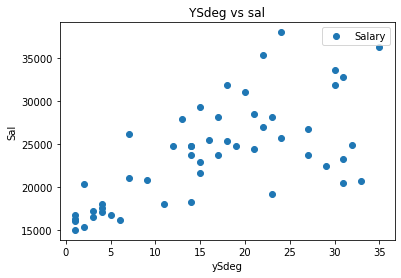

In [616]:
#Spliting
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs sal')
plt.xlabel('ySdeg')
plt.ylabel('Sal')
plt.show()



In [618]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


Highly correlated between Ysdeg and Salary so no transformation is required

In [619]:
#Initialising feature and target
#year and YSdeg are feature ,Salary is target
X = df[['Year', 'YSdeg']].values #array of features
y = df['Salary'].values #array of targets

In [620]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [621]:
#Scalling
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [622]:
#Modelling
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [623]:
coeff_df = pd.DataFrame(regressor.coef_,['Year', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Year,2829.003395
YSdeg,2351.163630


In [624]:
regressor.intercept_ # c 

23655.90243902439

In [625]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,19576.329537
1,17095,19415.708684
2,24750,28429.629678
3,22450,26057.034931
4,28200,26762.145316
5,21600,24965.353586
6,18075,18902.532639
7,23713,24227.578574
8,24800,25253.930665
9,33696,32952.922489


In [626]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5800978388278245


R2 score is between 0 and 1 so it is better model